# Tutorial for PyGazeTE

### 1. Import packages

In [1]:
%%time

from pygazete import *
import matplotlib.pyplot as plt
plt.style.use('default')

PygazeTE imported.
Some important defaults: 
	DISPSIZE = (1024, 1024) 	(Desired size of display in pixels),
	SCREENSIZE = (34.4, 19.3) 	(Size of screen in centimeters),
	ip = 172.20.10.3 		(IP address for Gazepoint connection),
	... ...
Please beware of the default constants and change variables to adapt.
You can either reassign the variables or change the default values in the root script from pygazete.constants
Wall time: 2.46 s


### 2. Set directories

In [2]:
DIR = os.getcwd()
print(DIR)
# the IMGDIR is the path to the directory that contains the image files
IMGDIR = os.path.join(DIR, 'data\\test_img')
os.listdir(IMGDIR)

C:\Users\Chloe\Documents\Capstone\Table_extraction


['img1994.png',
 'img1995.png',
 'img1996.png',
 'img1997.png',
 'img1998.png',
 'img1999.png']

### 3. Run YOLO table detection

In [3]:
%%time

# change path to test images
# and run this line for table detection
%run detect.py --weights best.pt --img 640 --conf 0.4 --source data/test_img --device cpu --save-crop --save-txt

detect: weights=['best.pt'], source=data/test_img, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  2022-5-4 torch 1.11.0+cu113 CPU

Fusing layers... 
YOLOv5x summary: 476 layers, 87198694 parameters, 0 gradients
image 1/6 C:\Users\Chloe\Documents\Capstone\Table_extraction\data\test_img\img1994.png: 640x512 1 table, Done. (1.410s)
image 2/6 C:\Users\Chloe\Documents\Capstone\Table_extraction\data\test_img\img1995.png: 640x512 1 table, Done. (1.320s)
image 3/6 C:\Users\Chloe\Documents\Capstone\Table_extraction\data\test_img\img1996.png: 640x512 1 table, Done. (1.331s)
image 4/6 C:\Users\Chloe\Documents\Capstone\Table_extraction\data\test_img\img1997.png:

Wall time: 14.1 s


### 4. Run OCR text recognition

In [4]:
# create output folders
def create_folders(DIR):
    global RESULTDIR
    global PREDDIR
    global LB_PREDDIR
    global CROPDIR
    global PLOTDIR
    global DATADIR
    global OCRDIR
    RESULTDIR = os.path.join(DIR, 'runs\\detect')

    exps = os.listdir(RESULTDIR)
    exps = sorted([e for e in exps if e != 'exp' and e.startswith('exp')], key = lambda x: int(x[3:]))
    PREDDIR = os.path.join(RESULTDIR, exps[-1])
    LB_PREDDIR = os.path.join(PREDDIR, 'labels')
    CROPDIR = os.path.join(PREDDIR, 'crops\\table')
    
    PLOTDIR = new_dir(PREDDIR, 'plots')
    DATADIR = new_dir(PREDDIR, 'gaze_data')
    OCRDIR = new_dir(PREDDIR, 'ocr')

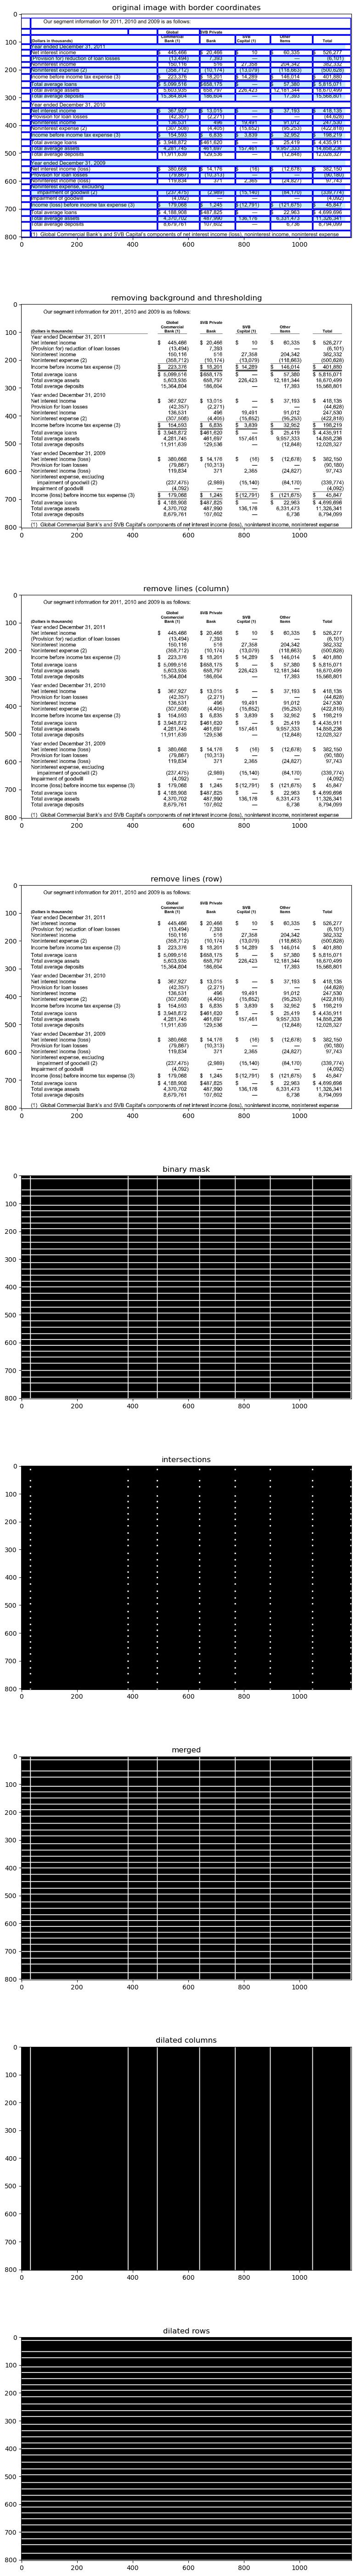

Time spent for processing and OCR: 43.234 s


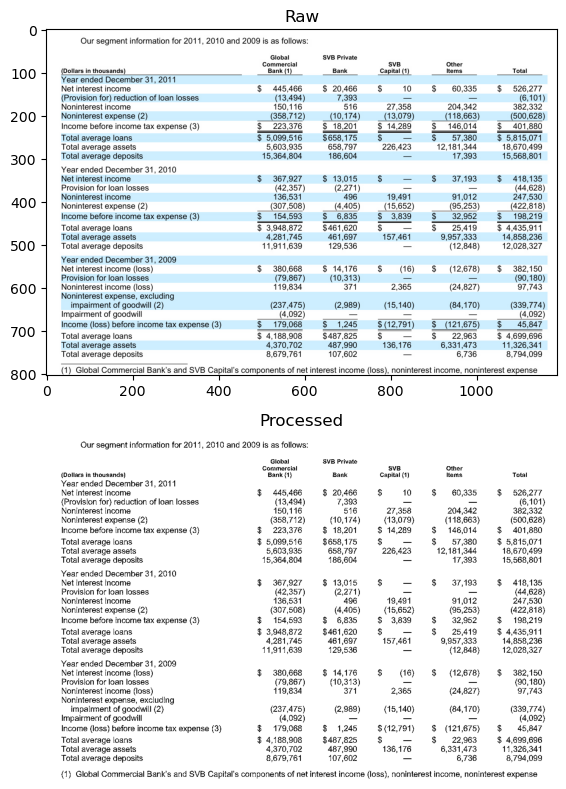

|    | 0                                                                                                                                | 1   | 2           | 3           | 4         | 5          | 6          |
|---:|:---------------------------------------------------------------------------------------------------------------------------------|:----|:------------|:------------|:----------|:-----------|:-----------|
|  0 | Our segment information for 2011, 2010 and 2009 is as follows:                                                                   |     |             |             |           |            |            |
|  1 |                                                                                                                                  |     | Global      | $VB Private |           |            |            |
|  2 | (Dollars in thousands)                                                                                                           |     |             | Ba

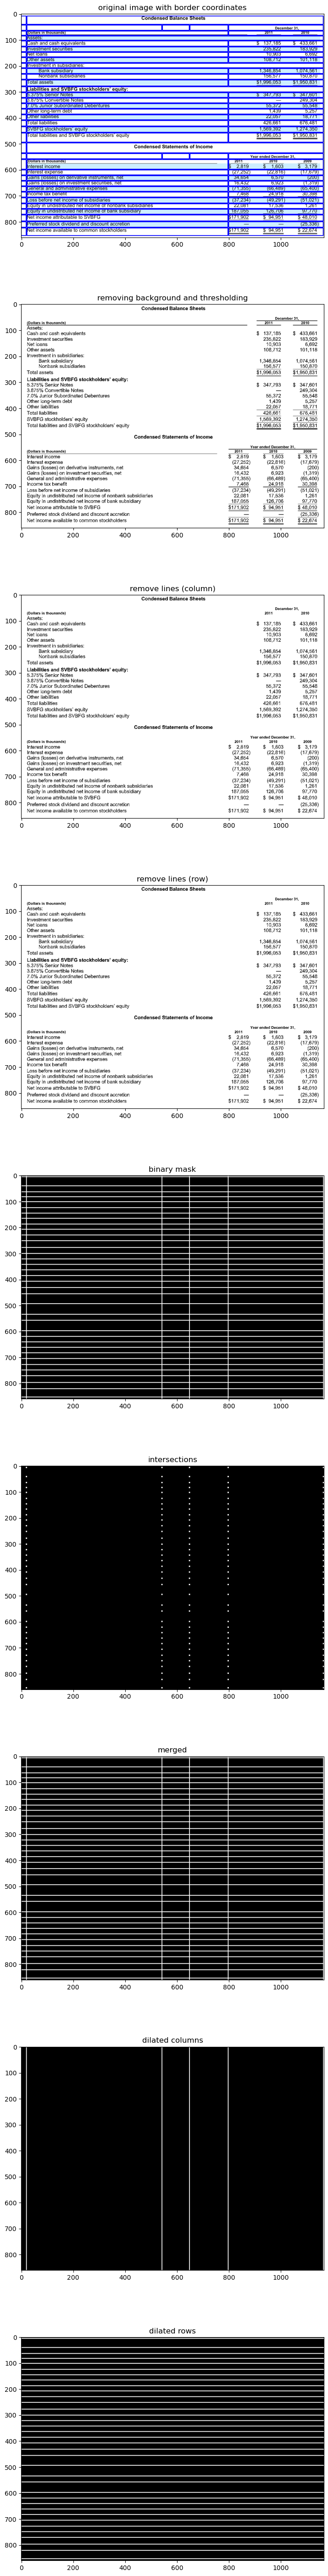

Time spent for processing and OCR: 25.329 s


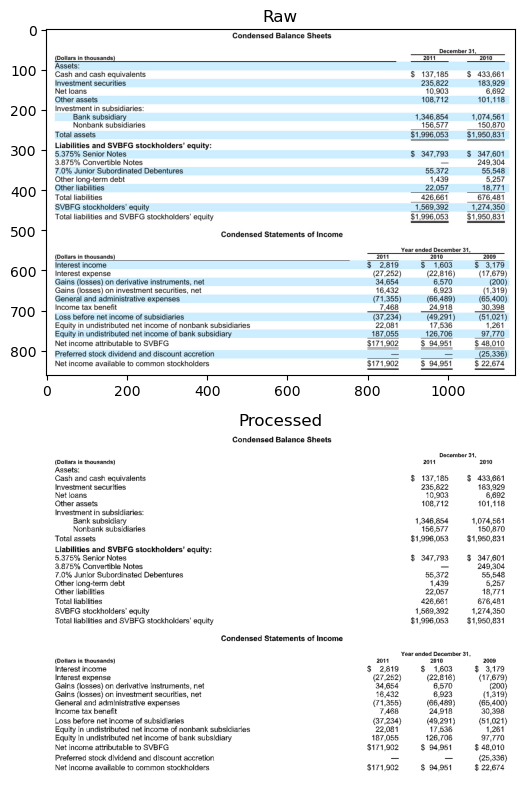

|    | 0                                                          | 1   | 2   | 3                          |
|---:|:-----------------------------------------------------------|:----|:----|:---------------------------|
|  0 | Condensed Balance Sheets                                   |     |     |                            |
|  1 |                                                            |     |     | December 31,               |
|  2 | (Dollars in thousands)                                     |     |     | 2011 2019                  |
|  3 | Assets:                                                    |     |     |                            |
|  4 | Cash and cash equivalents                                  |     |     | $137,185 $433,661          |
|  5 | Investment securtties                                      |     |     | 235,822 183,929            |
|  6 | Net loans                                                  |     |     | 10,903 6,692               |
|  7 | Other assets

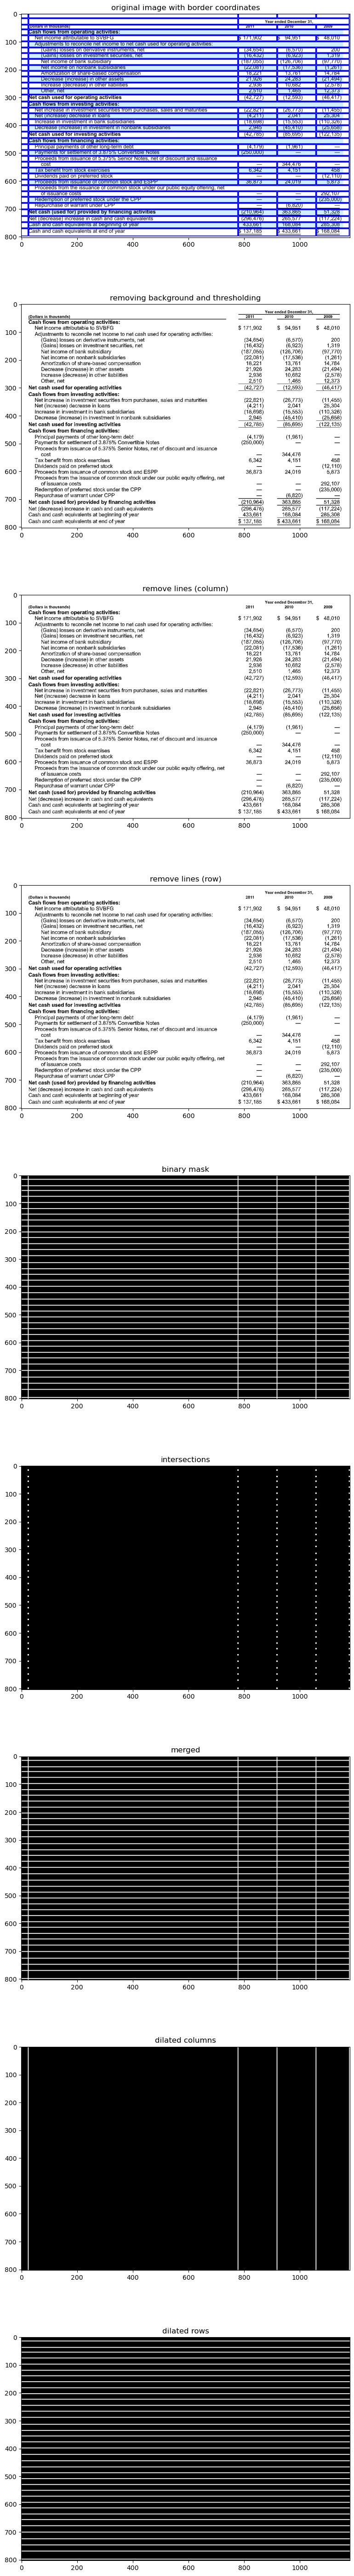

Time spent for processing and OCR: 39.471 s


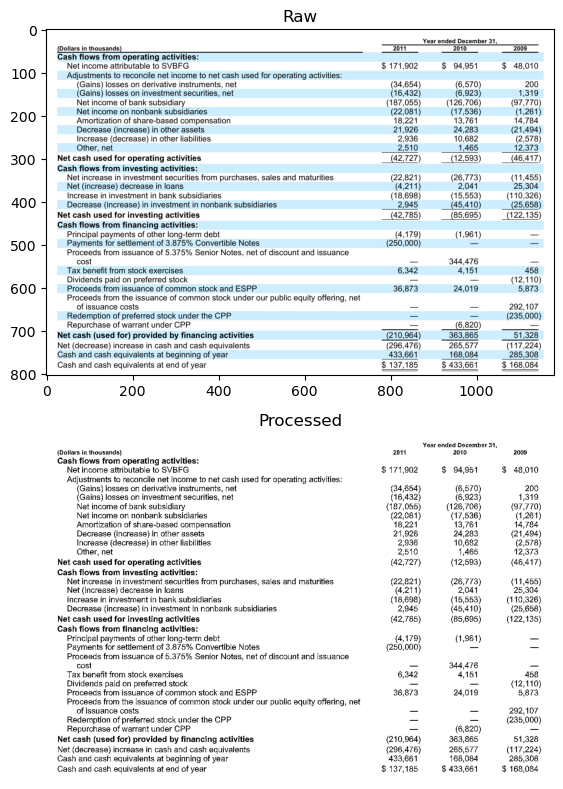

|    | 0                                                                                | 1                       | 2         | 3         |
|---:|:---------------------------------------------------------------------------------|:------------------------|:----------|:----------|
|  0 |                                                                                  | Year ended December 31, |           |           |
|  1 | (Dollars in thousands)                                                           | 2011                    | 2010      | 2002      |
|  2 | Cash flows from operating activities:                                            |                         |           |           |
|  3 | Net income attributable to SVBFG                                                 | $171,902                | $94,951   | $48,010   |
|  4 | Adjustments to reconcile net income to net cash used for operating activities:   |                         |           |           |
|  5 | ((ains) losse

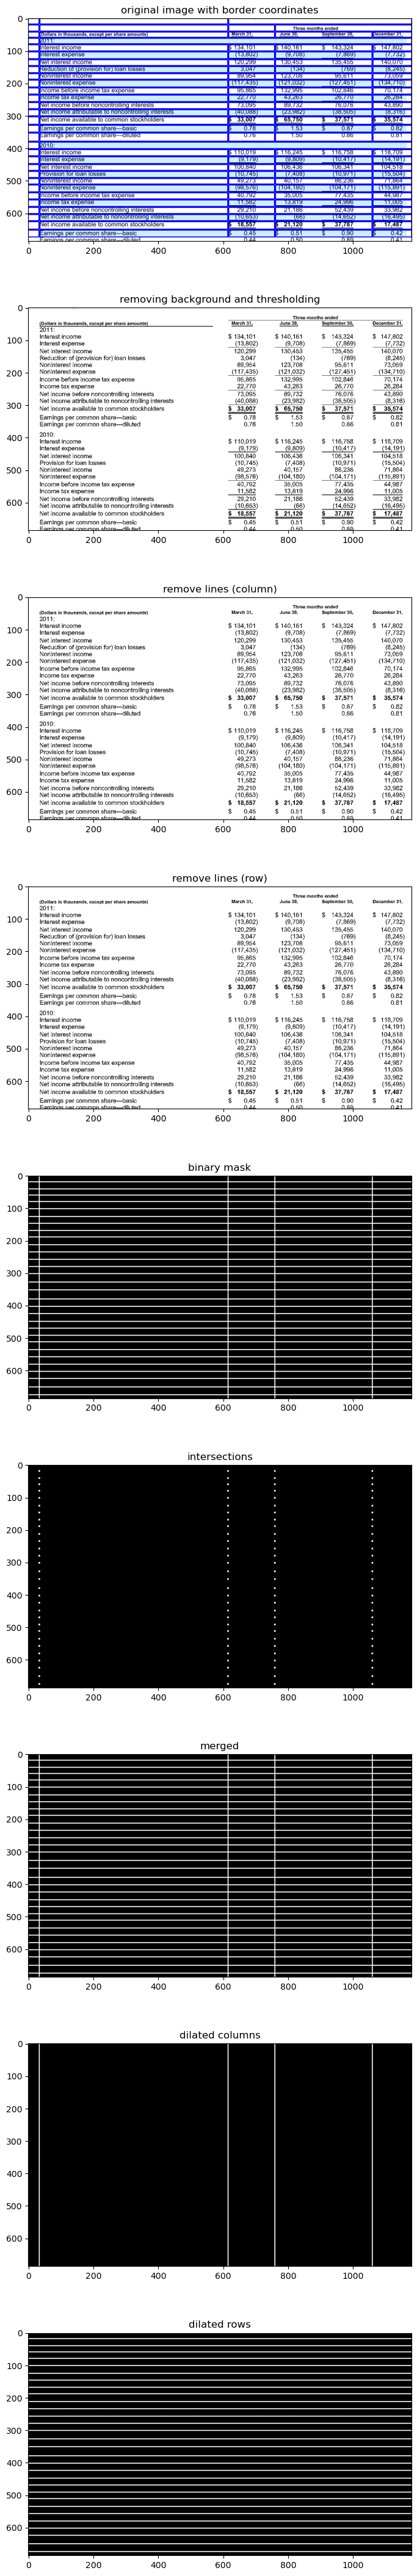

Time spent for processing and OCR: 31.740 s


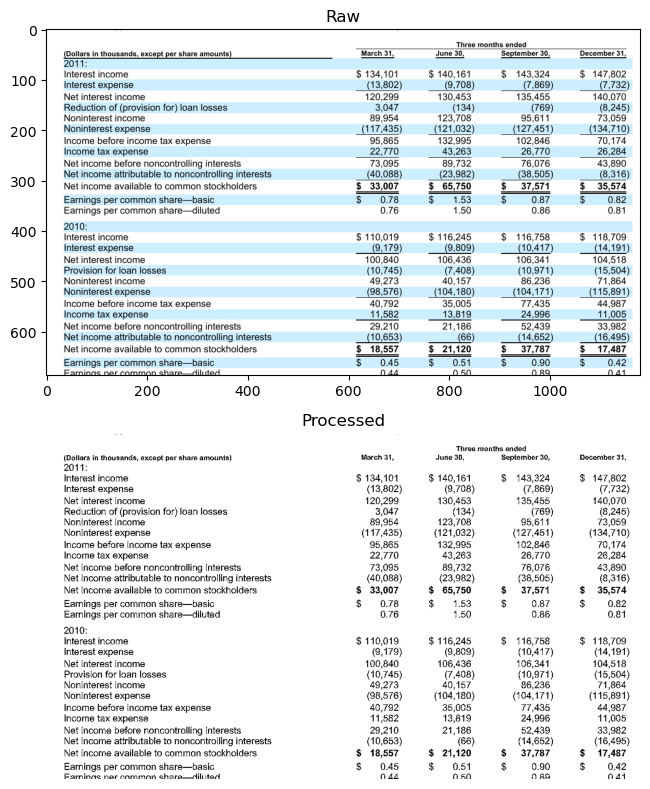

|    | 0                                                   | 1         | 2                      | 3            |
|---:|:----------------------------------------------------|:----------|:-----------------------|:-------------|
|  0 |                                                     |           |                        |              |
|  1 |                                                     |           | Three months ended     |              |
|  2 | (Dollars in thousands, except per share amounts)    | March 31, | June 30, September 30, | December 31, |
|  3 | 2011:                                               |           |                        |              |
|  4 | Interest income                                     | $134,101  | $140,161 $143,324      | $147,802     |
|  5 | Interest expense                                    | (13,802)  | (9,708) (7,869)        | (7,732)      |
|  6 | Net interest income                                 | 120,299   | 130,453 135,455        

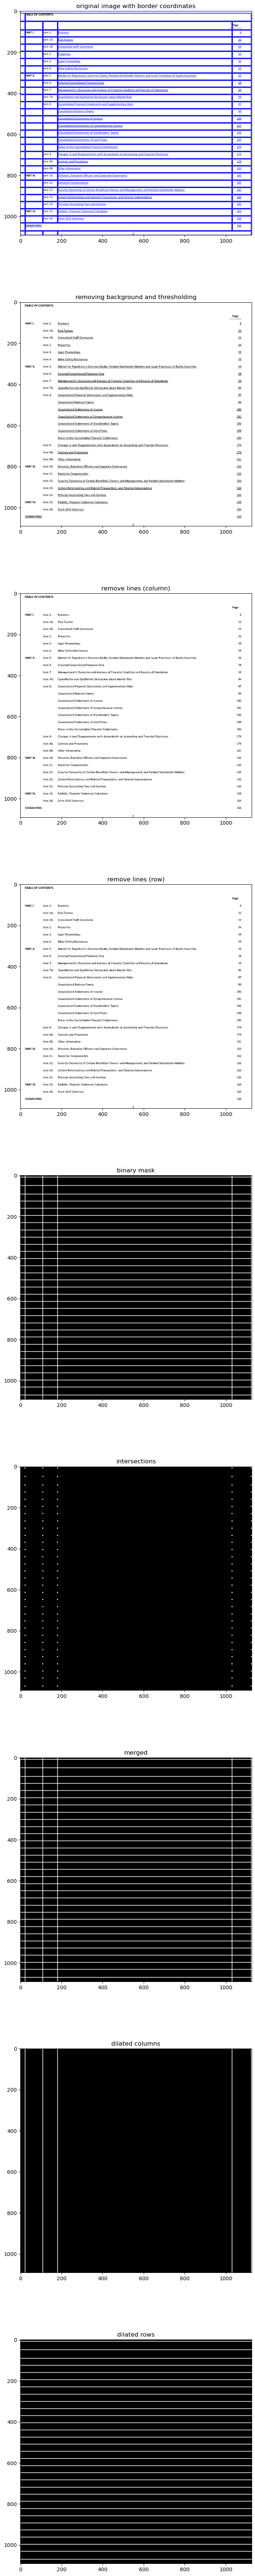

Time spent for processing and OCR: 33.858 s


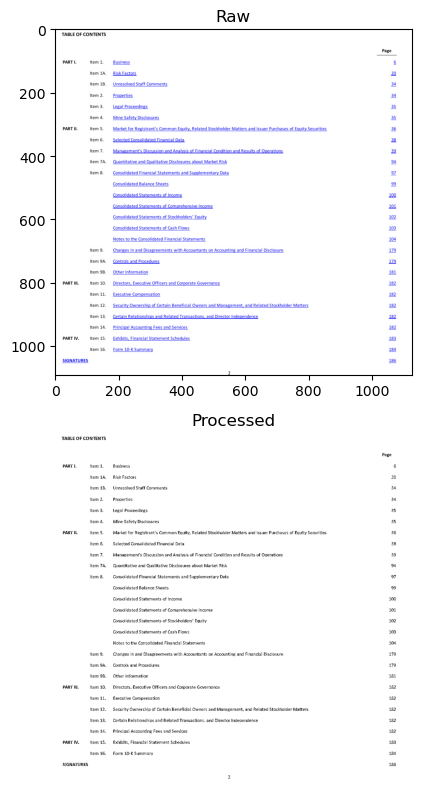

|    | 0                 | 1    | 2                                                                                                        | 3   |
|---:|:------------------|:-----|:---------------------------------------------------------------------------------------------------------|:----|
|  0 | (ABLE OF CONTENTS |      |                                                                                                          |     |
|  1 |                   |      |                                                                                                          | P   |
|  2 | PAR1              | 1    | Bsine                                                                                                    | 6   |
|  3 |                   | e 14 | Ri Fct                                                                                                   | 20  |
|  4 |                   | e 18 | Unresolved staf Comments                                                            

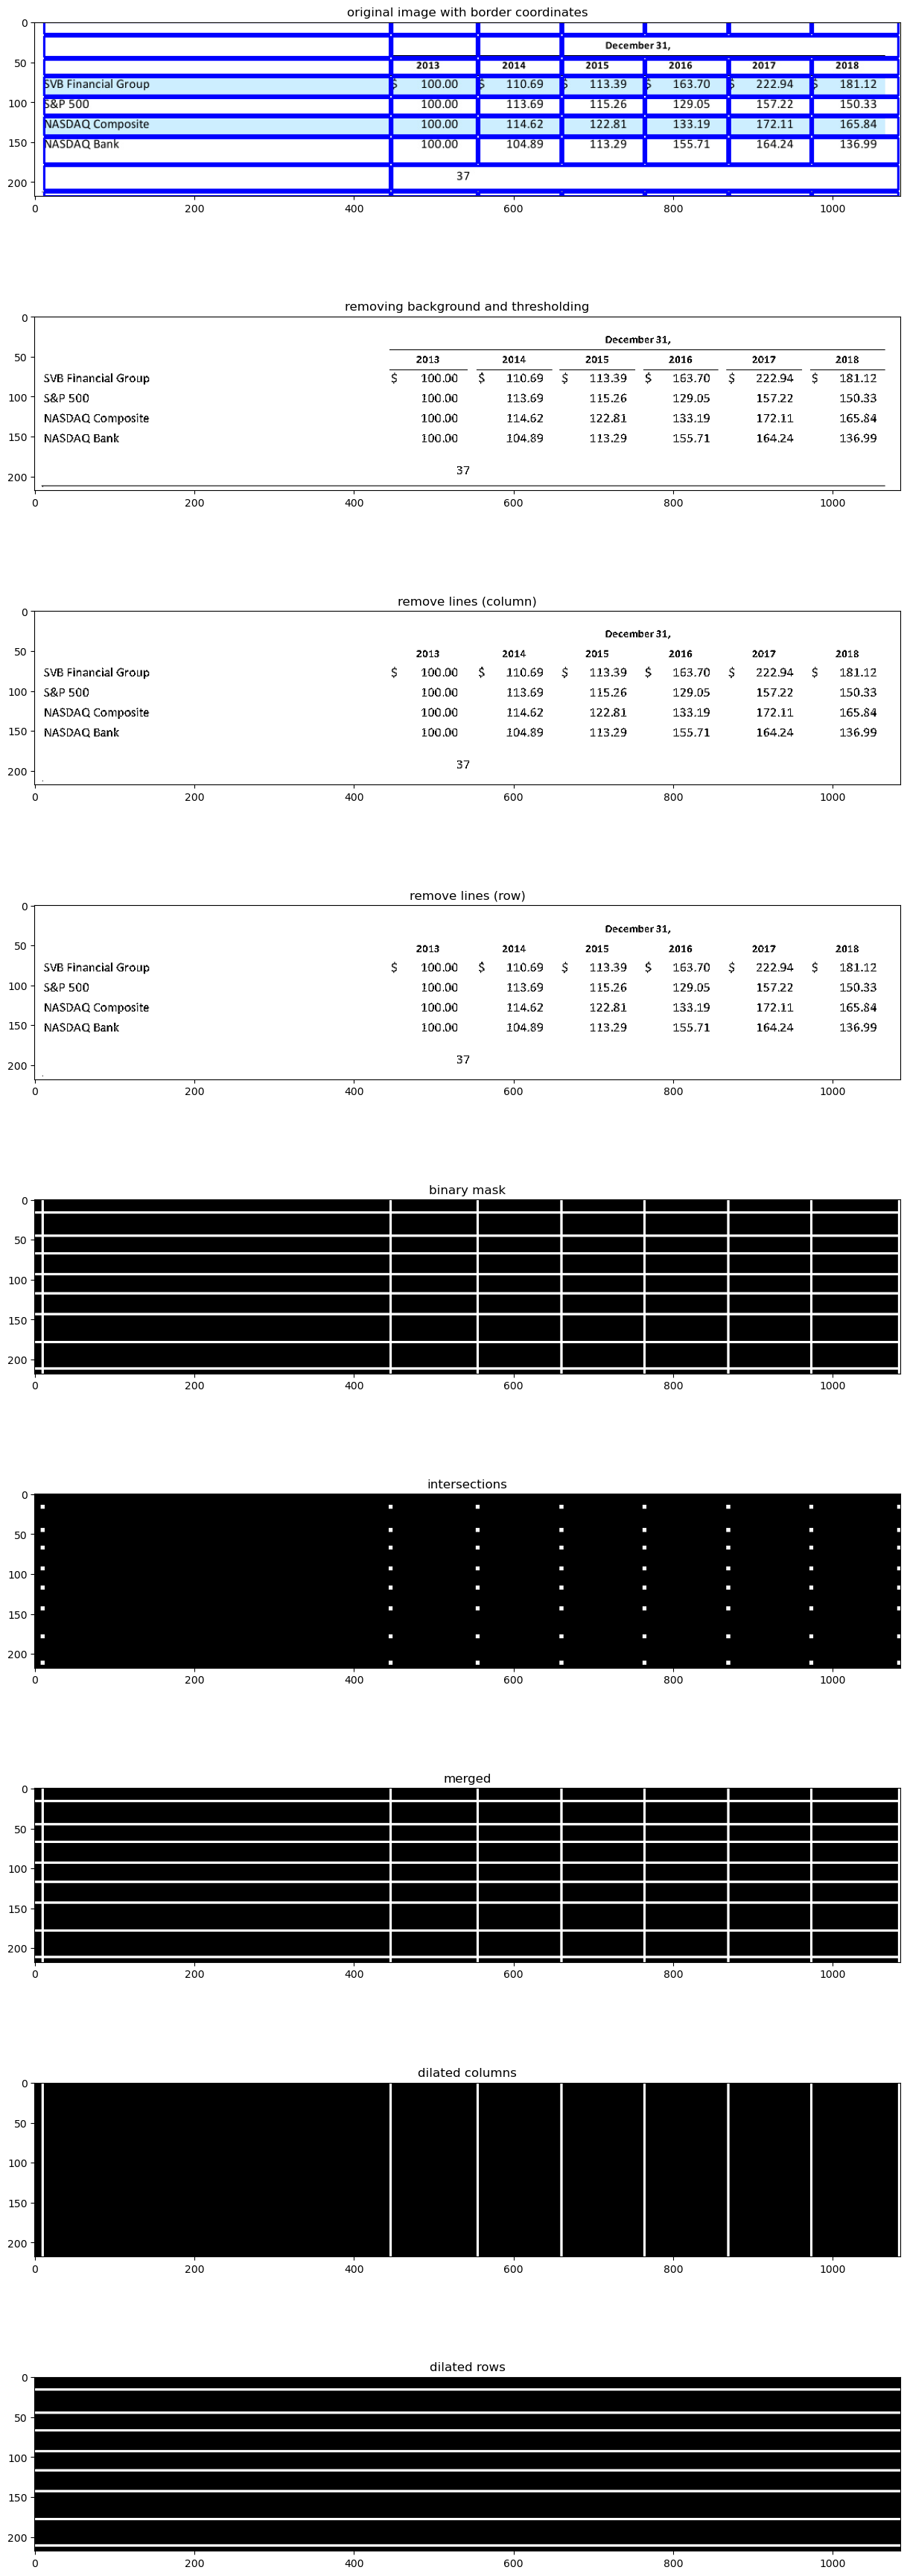

Time spent for processing and OCR: 15.029 s


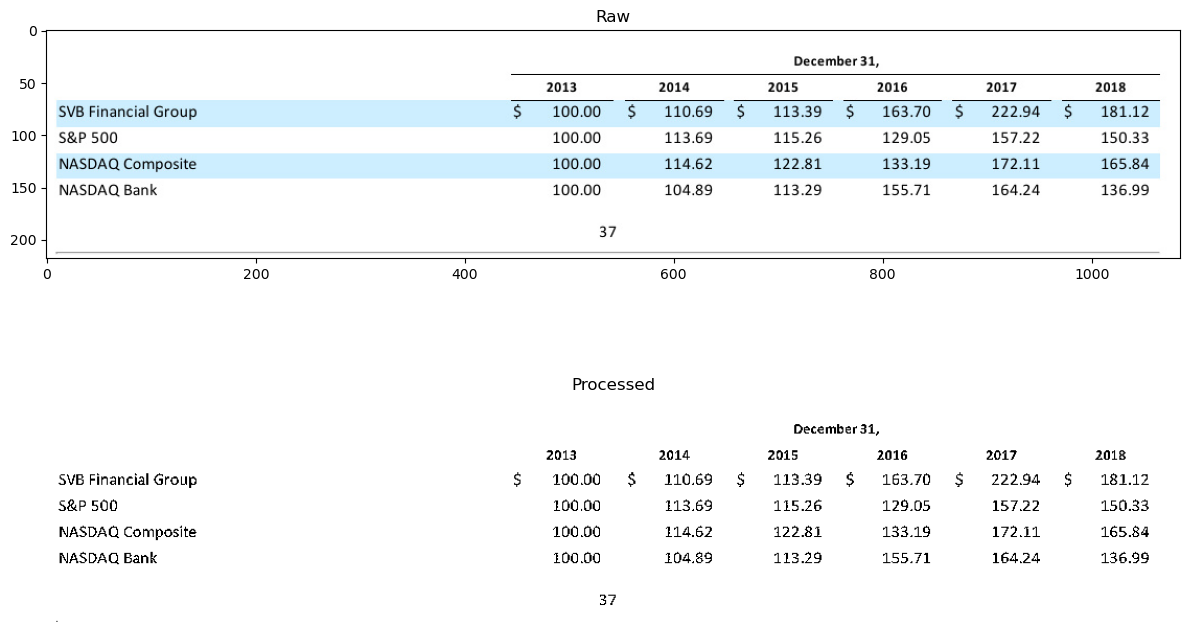

|    | 0                  | 1       | 2       | 3           | 4       | 5       | 6       |
|---:|:-------------------|:--------|:--------|:------------|:--------|:--------|:--------|
|  0 |                    | ,,,,    | ,,,,    | December31, |         |         |         |
|  1 |                    | 2013    | 2014    | 2015        | 2016    | 2017    | 2018    |
|  2 | $V Financial Group | $100.00 | $110.63 | $113.33     | $163.70 | $222.94 | $181.12 |
|  3 | $&P 500            | 100.00  | 113.69  | 115.26      | 125.05  | 157.22  | 150.33  |
|  4 | NASDAQ Composite   | 100.00  | 114.62  | 122.81      | 133.198 | 172.31  | 165.54  |
|  5 | NASDA Bank         | 100.00  | 104.83  | 113.23      | 155.71  | 164.24  | 136.35  |
|  6 |                    | 37      |         |             |         |         |         |
|  7 |                    |         |         |             |         |         |         |
Wall time: 3min 10s


In [5]:
%%time


#run OCR for text content
#Please note that split-by-cell and using mode = 7 would be more precise but take much longer time to process and predict

mode = 7
split = 'cell'  # or 'row'
create_folders(DIR)
for img in os.listdir(CROPDIR):
    path = os.path.join(CROPDIR, img)
    # if tables already have gridlines, change borderless to False
    data = extract(path, OCRDIR, split=split, mode=mode, borderless=True, debug = False, display_data=False)

The steps above can run independently without an eye tracker. The table detection and text recognition models will automatically make predictions for all tables within each test image.

### 5. Run eye-tracking experiment

Please make sure you connect your mouse and have an eye tracking equipment before running this chunk. The initialization would take about 70 seconds, then the calibration would take about 30 seconds, then the images would be displayed on the screen. After the experiment, the data would be stored and processed, and you would be able to see the results after that. 

If any process except for the initialization stucks for too long like more than one minute, please click the mouse several times to end the kernel and check the mistakes. 

In [ ]:
%%time

### NOTE: please check your ip address in Gazepoint Control's settings
### ip = '172.20.10.3'0
kwargs = {'IMGDIR':IMGDIR, 'DIR':DIR}
t_list = advanced(**kwargs)